In [1]:
!pip install konlpy #한글의 형태소 분석등을 위한 꼬꼬마를 사용하기위해 설치

     |████████████████████████████████| 19.4 MB 1.5 MB/s 
     |████████████████████████████████| 86 kB 2.6 MB/s 
     |████████████████████████████████| 448 kB 17.9 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [2]:
!pip install wordcloud

In [8]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import nltk 
from konlpy.tag import Kkma
from konlpy.tag import Okt
from wordcloud import WordCloud

okt = Okt()

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final_Project/국민청원 분석 깃허브예제/data/petitions_b.csv', index_col=0, \
                 parse_dates=['sday', 'eday'])
# 데이터의 크기가 어느정도인지 본다.
df.shape

(2722, 9)

In [14]:
print(okt.morphs(df['title'][600000]))

['프리랜서', '강사', '들', '도', '도와주세요', '.']


In [15]:
print(okt.nouns(df['title'][600000]))

['프리랜서', '강사']


In [16]:
from collections import Counter

In [33]:
import csv

f = open('/content/drive/MyDrive/Colab Notebooks/Final_Project/국민청원 분석 깃허브예제/data/petition_contents.txt', 'r', encoding='utf-8')
contents = f.read()

In [37]:
f = open('/content/drive/MyDrive/Colab Notebooks/Final_Project/국민청원 분석 깃허브예제/data/petition_title.txt', 'r', encoding='utf-8')
titles = f.read()

In [34]:
okt = Okt()
noun = okt.nouns(contents)
count = Counter(noun) #okt 객체 생성

In [35]:
#명사 빈도 카운트
noun_list = count.most_common(100)
for v in noun_list:
  print(v)

('것', 9394)
('수', 7446)
('병원', 6577)
('코로나', 6121)
('백신', 5615)
('국민', 5453)
('이', 4394)
('접종', 4149)
('그', 4043)
('저', 3930)
('환자', 3890)
('치료', 3803)
('생각', 3454)
('사람', 3432)
('제', 3297)
('상황', 3165)
('의사', 3088)
('정부', 3079)
('등', 2972)
('의료', 2932)
('말', 2916)
('저희', 2882)
('후', 2820)
('더', 2775)
('검사', 2698)
('아이', 2501)
('대한', 2322)
('간호사', 2307)
('현재', 2293)
('때', 2194)
('이상', 2139)
('일', 2122)
('지금', 2097)
('및', 2076)
('가족', 2015)
('청원', 1958)
('위해', 1955)
('위', 1862)
('차', 1837)
('때문', 1781)
('방역', 1733)
('우리', 1720)
('명', 1707)
('부작용', 1643)
('상태', 1640)
('국가', 1638)
('문제', 1628)
('분', 1623)
('중', 1581)
('시간', 1569)
('마스크', 1569)
('경우', 1550)
('못', 1535)
('수술', 1509)
('내용', 1485)
('전', 1467)
('발생', 1462)
('감염', 1462)
('확', 1457)
('대해', 1407)
('진자', 1398)
('또한', 1381)
('시설', 1367)
('이유', 1342)
('다른', 1340)
('결과', 1326)
('진료', 1324)
('사회', 1322)
('알', 1320)
('아버지', 1319)
('모든', 1313)
('지원', 1298)
('관리', 1291)
('입원', 1274)
('정책', 1240)
('건강', 1237)
('보험', 1226)
('약', 1223)
('왜'

In [36]:
#한 글자 짜리 명사 제외시키기
okt = Okt()
noun = okt.nouns(contents)
for i,v in enumerate(noun):
  if len(v)<2:
    noun.pop(i)

count = Counter(noun)

#카운트
noun_list = count.most_common(100)
for v in noun_list:
  print(v)

('병원', 6577)
('코로나', 6121)
('백신', 5615)
('국민', 5453)
('접종', 4149)
('환자', 3890)
('치료', 3803)
('생각', 3454)
('사람', 3432)
('상황', 3165)
('의사', 3088)
('정부', 3079)
('의료', 2932)
('저희', 2882)
('검사', 2698)
('아이', 2501)
('대한', 2322)
('간호사', 2307)
('현재', 2293)
('이상', 2139)
('지금', 2097)
('가족', 2015)
('청원', 1958)
('위해', 1955)
('때문', 1781)
('것', 1734)
('방역', 1733)
('우리', 1720)
('부작용', 1643)
('상태', 1640)
('국가', 1638)
('문제', 1628)
('시간', 1569)
('마스크', 1569)
('경우', 1550)
('수술', 1509)
('내용', 1485)
('발생', 1462)
('감염', 1462)
('수', 1411)
('대해', 1407)
('진자', 1398)
('또한', 1381)
('시설', 1367)
('이유', 1342)
('다른', 1340)
('결과', 1326)
('진료', 1324)
('사회', 1322)
('아버지', 1319)
('모든', 1313)
('지원', 1298)
('관리', 1291)
('입원', 1274)
('정책', 1240)
('건강', 1237)
('보험', 1226)
('모두', 1173)
('간호', 1168)
('다시', 1149)
('어머니', 1143)
('정도', 1118)
('대한민국', 1091)
('격리', 1073)
('확인', 1065)
('지역', 1048)
('관련', 1039)
('피해', 1028)
('정말', 1026)
('진행', 1020)
('사망', 1015)
('일부', 1013)
('계속', 1006)
('기관', 998)
('생활', 985)
('업무', 982)
('마음', 96

In [38]:
#한 글자 짜리 명사 제외시키기
okt = Okt()
noun = okt.nouns(titles)
for i,v in enumerate(noun):
  if len(v)<2:
    noun.pop(i)

count = Counter(noun)

#카운트
noun_list = count.most_common(100)
for v in noun_list:
  print(v)

('코로나', 665)
('백신', 444)
('접종', 316)
('국민', 167)
('병원', 164)
('치료', 151)
('청원', 142)
('대한', 129)
('환자', 128)
('의료', 123)
('요청', 118)
('방역', 109)
('지원', 108)
('반대', 107)
('패스', 107)
('검사', 106)
('화이자', 104)
('마스크', 95)
('재난', 94)
('보험', 93)
('의사', 93)
('저희', 81)
('정부', 77)
('격리', 76)
('아버지', 74)
('부작용', 74)
('원금', 69)
('처벌', 68)
('사망', 68)
('진자', 66)
('개선', 63)
('건강', 62)
('해외', 62)
('금지', 61)
('진단', 60)
('긴급', 56)
('시오', 56)
('관련', 54)
('적용', 53)
('요구', 53)
('입국', 53)
('자가', 52)
('지급', 51)
('거리', 50)
('철회', 49)
('장애인', 49)
('백혈병', 49)
('국가', 48)
('간호사', 48)
('두기', 48)
('사회', 47)
('정책', 46)
('시설', 46)
('수술', 45)
('어머니', 45)
('간호', 44)
('지역', 42)
('의무', 42)
('아이', 42)
('급성', 42)
('촉구', 41)
('공개', 40)
('제한', 40)
('요양', 40)
('대해', 40)
('의대', 40)
('대통령', 39)
('기준', 39)
('관리', 38)
('대책', 38)
('제발', 38)
('엄마', 38)
('아동', 38)
('위해', 37)
('이상', 37)
('복지', 37)
('센터', 36)
('급여', 36)
('아스', 36)
('보호', 35)
('생명', 35)
('제도', 35)
('마련', 35)
('카', 35)
('제안', 34)
('고발', 34)
('사람', 34)
('진료', 33)
('시행',

In [48]:
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 나눔고딕 설치
!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm
fontpath = 'C:\Windows\Fonts\H2GTRE.TTF'
font = fm.FontProperties(fname=fontpath, size=9)

In [56]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [2]:
plt.rc('font', family='NanumBarunGothic') 

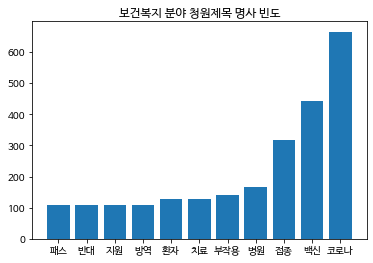

In [7]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(11)
nouns = ['패스', '반대', '지원', '방역', '환자', '치료', '부작용', '병원', '접종', '백신', '코로나']
values = [107, 107, 108, 109, 128, 129, 142, 167, 316, 444, 665]
plt.title("보건복지 분야 청원제목 명사 빈도")

plt.bar(x, values)
plt.xticks(x, nouns)
plt.show()